In [1]:
import os
import pickle
import pandas as pd
import json
import sys
import matplotlib.pyplot as plt

In [2]:
def get_metric_dataframes(configs):
    '''
    Get dataframes of calculated metrics
    '''

    mmd_zeo_agg_df = pd.read_csv(f"../runs/{configs['model_type']}/{configs['split']}/{configs['fname']}/mmd_zeo_agg_df.csv")
    wsd_zeo_agg_df = pd.read_csv(f"../runs/{configs['model_type']}/{configs['split']}/{configs['fname']}/wsd_zeo_agg_df.csv")
    mmd_zeo_osda_df = pd.read_csv(f"../runs/{configs['model_type']}/{configs['split']}/{configs['fname']}/mmd_zeo_osda_df.csv")
    wsd_zeo_osda_df = pd.read_csv(f"../runs/{configs['model_type']}/{configs['split']}/{configs['fname']}/wsd_zeo_osda_df.csv")

    return mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df

In [3]:
model_type = 'cvae' # 'cvae'
split = 'system'

fname = 'v9'
with open(f'../runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs_v9 = json.load(f)

fname = 'v10'
with open(f'../runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs_v10 = json.load(f)

mmd_zeo_agg_df_v9, wsd_zeo_agg_df_v9, _, _ = get_metric_dataframes(configs_v9)
mmd_zeo_agg_df_v10, wsd_zeo_agg_df_v10, _, _ = get_metric_dataframes(configs_v10)

# Metrics in decreasing frequency in test set

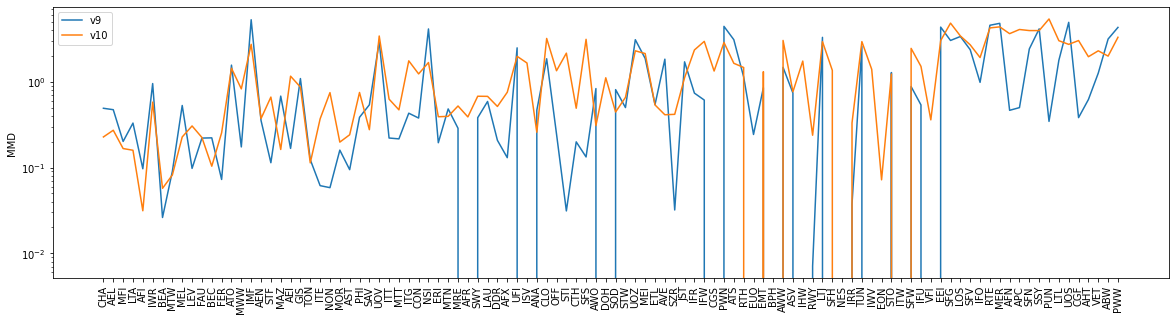

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(mmd_zeo_agg_df_v9['zeo'], mmd_zeo_agg_df_v9['MMD'], label='v9')
plt.plot(mmd_zeo_agg_df_v10['zeo'], mmd_zeo_agg_df_v10['MMD'], label='v10')
plt.ylabel('MMD')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend()
plt.show()

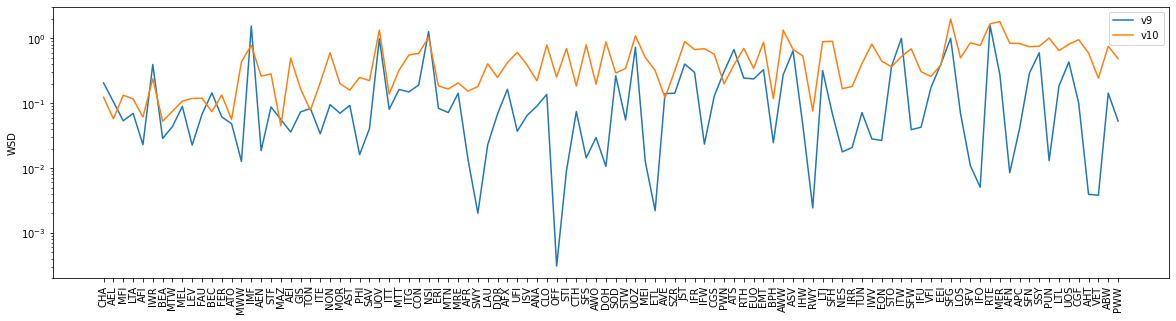

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(wsd_zeo_agg_df_v9['zeo'], wsd_zeo_agg_df_v9['WSD'], label='v9')
plt.plot(wsd_zeo_agg_df_v10['zeo'], wsd_zeo_agg_df_v10['WSD'], label='v10')
plt.ylabel('WSD')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend()
plt.show()